# Momentum Strategy Case Study

### (1) Data Preparation

In [33]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor

data_spy = pd.read_csv('SPY0.csv')
data_xlk = pd.read_csv('XLK.csv')
data_xlf = pd.read_csv('XLF.csv')
data_xli = pd.read_csv('XLI.csv')

spy1 = list(data_spy.loc[39:,:]["Close"])
spy2 = list(data_spy.loc[35:(len(spy1)+35-1),:]["Close"])
spy3 = list(data_spy.loc[30:(len(spy1)+30-1),:]["Close"])
spy4 = list(data_spy.loc[20:(len(spy1)+20-1),:]["Close"])
spy5 = list(data_spy.loc[:(len(spy1)-1),:]["Close"])

xlk1 = list(data_xlk.loc[39:,:]["Close"])
xlk2 = list(data_xlk.loc[35:(len(spy1)+35-1),:]["Close"])
xlk3 = list(data_xlk.loc[30:(len(spy1)+30-1),:]["Close"])
xlk4 = list(data_xlk.loc[20:(len(spy1)+20-1),:]["Close"])
xlk5 = list(data_xlk.loc[:(len(spy1)-1),:]["Close"])

xlf1 = list(data_xlf.loc[39:,:]["Close"])
xlf2 = list(data_xlf.loc[35:(len(spy1)+35-1),:]["Close"])
xlf3 = list(data_xlf.loc[30:(len(spy1)+30-1),:]["Close"])
xlf4 = list(data_xlf.loc[20:(len(spy1)+20-1),:]["Close"])
xlf5 = list(data_xlf.loc[:(len(spy1)-1),:]["Close"])

xli1 = list(data_xli.loc[39:,:]["Close"])
xli2 = list(data_xli.loc[35:(len(spy1)+35-1),:]["Close"])
xli3 = list(data_xli.loc[30:(len(spy1)+30-1),:]["Close"])
xli4 = list(data_xli.loc[20:(len(spy1)+20-1),:]["Close"])
xli5 = list(data_xli.loc[:(len(spy1)-1),:]["Close"])

data_spy_selected = data_spy.loc[39:,:]
data_spy_selected.set_index('Dt',inplace=True)
date = list(data_spy_selected.index)

data = []
for i in range(len(spy1)):
    data.append([date[i],spy1[i],spy2[i],spy3[i],spy4[i],spy5[i],
                xlk1[i],xlk2[i],xlk3[i],xlk4[i],xlk5[i],
                xlf1[i],xlf2[i],xlf3[i],xlf4[i],xlf5[i],
                xli1[i],xli2[i],xli3[i],xli4[i],xli5[i]])
    
df = pd.DataFrame(data, columns = ['Date', 'SPY', 'SPY - 1 Week', 'SPY - 2 Weeks', 'SPY - 1 Month', 'SPY - 2 Months',
                                  'XLK','XLK - 1 Week', 'XLK - 2 Weeks', 'XLK - 1 Month', 'XLK - 2 Months',
                                  'XLF','XLF - 1 Week', 'XLF - 2 Weeks', 'XLF - 1 Month', 'XLF - 2 Months',
                                  'XLI','XLI - 1 Week', 'XLI - 2 Weeks', 'XLI - 1 Month', 'XLI - 2 Months']) 
df.set_index('Date',inplace=True)

length = len(df["SPY"])
for i in reversed(range(0,length)):
    df["SPY - 1 Week"][i] = df["SPY"][i]/df["SPY - 1 Week"][i] - 1
    df["SPY - 2 Weeks"][i] = df["SPY"][i]/df["SPY - 2 Weeks"][i] - 1
    df["SPY - 1 Month"][i] = df["SPY"][i]/df["SPY - 1 Month"][i] - 1
    df["SPY - 2 Months"][i] = df["SPY"][i]/df["SPY - 2 Months"][i] - 1
    df["XLK - 1 Week"][i] = df["XLK"][i]/df["XLK - 1 Week"][i] - 1
    df["XLK - 2 Weeks"][i] = df["XLK"][i]/df["XLK - 2 Weeks"][i] - 1
    df["XLK - 1 Month"][i] = df["XLK"][i]/df["XLK - 1 Month"][i] - 1
    df["XLK - 2 Months"][i] = df["XLK"][i]/df["XLK - 2 Months"][i] - 1
    df["XLF - 1 Week"][i] = df["XLF"][i]/df["XLF - 1 Week"][i] - 1
    df["XLF - 2 Weeks"][i] = df["XLF"][i]/df["XLF - 2 Weeks"][i] - 1
    df["XLF - 1 Month"][i] = df["XLF"][i]/df["XLF - 1 Month"][i] - 1
    df["XLF - 2 Months"][i] = df["XLF"][i]/df["XLF - 2 Months"][i] - 1
    df["XLI - 1 Week"][i] = df["XLI"][i]/df["XLI - 1 Week"][i] - 1
    df["XLI - 2 Weeks"][i] = df["XLI"][i]/df["XLI - 2 Weeks"][i] - 1
    df["XLI - 1 Month"][i] = df["XLI"][i]/df["XLI - 1 Month"][i] - 1
    df["XLI - 2 Months"][i] = df["XLI"][i]/df["XLI - 2 Months"][i] - 1
    df["SPY"][i] = df["SPY"][i]/df["SPY"][i-1] - 1

df.loc["2018-02-23","SPY"] = data_spy.loc[39,"Close"]/data_spy.loc[38,"Close"] - 1

df = df.drop(['XLK', 'XLF', 'XLI'], axis=1)

df.head()

,SPY,SPY - 1 Week,SPY - 2 Weeks,SPY - 1 Month,SPY - 2 Months,XLK - 1 Week,XLK - 2 Weeks,XLK - 1 Month,XLK - 2 Months,XLF - 1 Week,XLF - 2 Weeks,XLF - 1 Month,XLF - 2 Months,XLI - 1 Week,XLI - 2 Weeks,XLI - 1 Month,XLI - 2 Months
Date,,,,,,,,,,,,,,,,,
2018-02-23,0.015939,0.005858,0.050516,-0.041419,0.027645,0.016523,0.074925,-0.013008,0.064039,0.004831,0.052023,-0.034803,0.040000,0.005046,0.052432,-0.036945,0.026698
2018-02-26,0.011612,0.023950,0.047335,-0.023816,0.037444,0.031529,0.072522,0.011669,0.078861,0.023191,0.053082,-0.016306,0.051583,0.029277,0.050000,-0.017099,0.038781
2018-02-27,-0.012487,0.016219,0.031692,-0.026015,0.028367,0.027690,0.059078,0.010598,0.073651,0.012098,0.038666,-0.012812,0.049086,0.016072,0.034455,-0.021764,0.027620
2018-02-28,-0.010130,0.004623,0.007641,-0.036360,0.010715,0.019136,0.032566,-0.004091,0.052981,0.006274,0.000347,-0.029254,0.034026,-0.005062,0.006963,-0.038630,0.006963
2018-03-01,-0.014541,-0.025518,-0.019522,-0.049293,-0.010241,-0.018304,-0.003567,-0.021457,0.026961,-0.025755,-0.022398,-0.054963,0.010688,-0.032570,-0.027436,-0.055786,-0.018032


### (2) Ordinary Least Squares

,SPY,OLS Next-Day Prediction,Next-Day Strategy,Long-Only Return,Momentum Strategy Return,SPY - 1 Week,SPY - 2 Weeks,SPY - 1 Month,SPY - 2 Months,XLK - 1 Week,...,XLK - 1 Month,XLK - 2 Months,XLF - 1 Week,XLF - 2 Weeks,XLF - 1 Month,XLF - 2 Months,XLI - 1 Week,XLI - 2 Weeks,XLI - 1 Month,XLI - 2 Months
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-18,0.002104,-0.000102,-1,1.000000,1.000000,0.006049,0.029109,0.018444,0.030997,0.002341,...,0.016904,0.049301,0.030627,0.052374,0.023827,-0.014467,0.016083,0.036713,0.017331,-0.012975
2018-07-19,-0.003771,0.003114,1,0.996229,1.003771,0.001466,0.016629,0.021004,0.024290,-0.000138,...,0.021118,0.037922,0.019644,0.031496,0.011397,-0.023082,0.010441,0.032705,0.029851,-0.012457
2018-07-20,-0.001143,0.010937,1,0.995090,1.002624,0.001217,0.006405,0.017981,0.025220,0.002487,...,0.024718,0.039398,0.003642,0.010264,0.018101,-0.013601,0.013479,0.012789,0.025203,-0.018330
2018-07-23,0.001859,0.010336,1,0.996940,1.004488,-0.000963,0.004661,0.033948,0.029579,0.000137,...,0.051781,0.045448,0.016370,0.027962,0.043316,0.003232,0.003255,0.003391,0.031943,-0.022592
2018-07-24,0.005032,0.012235,1,1.001957,1.009543,0.001957,0.017157,0.036856,0.046799,0.007281,...,0.053297,0.056941,0.003222,0.035860,0.049831,0.040862,-0.003488,0.024407,0.032379,-0.002551


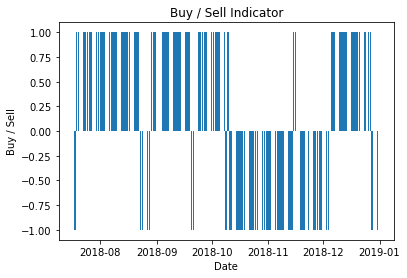

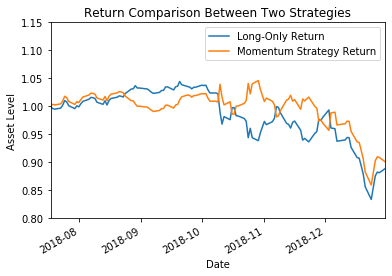

In [34]:
import matplotlib.pyplot as plt

y_pre = np.array([])
for i in range(0,61,30):
    X_training_set = df.iloc[i:(i+100),:]
    y_training_set = df.iloc[(i+1):(i+101),:]
    predict_set = df.iloc[(i+100):(i+130),:]
    X_training = X_training_set[["SPY - 1 Week","SPY - 2 Weeks","SPY - 1 Month","SPY - 2 Months",
                               "XLK - 1 Week","XLK - 2 Weeks","XLK - 1 Month","XLK - 2 Months",
                               "XLF - 1 Week","XLF - 2 Weeks","XLF - 1 Month","XLF - 2 Months",
                               "XLI - 1 Week","XLI - 2 Weeks","XLI - 1 Month","XLI - 2 Months",]].to_numpy().reshape((-1,16))
    y_training = y_training_set["SPY"].to_numpy().reshape((-1,1))
    X_pre = predict_set[["SPY - 1 Week","SPY - 2 Weeks","SPY - 1 Month","SPY - 2 Months",
                               "XLK - 1 Week","XLK - 2 Weeks","XLK - 1 Month","XLK - 2 Months",
                               "XLF - 1 Week","XLF - 2 Weeks","XLF - 1 Month","XLF - 2 Months",
                               "XLI - 1 Week","XLI - 2 Weeks","XLI - 1 Month","XLI - 2 Months",]].to_numpy().reshape((-1,16))
    regr = LinearRegression().fit(X_training, y_training)
    pre = regr.predict(X_pre).reshape((1,-1))
    y_pre = np.concatenate((y_pre,pre),axis=None)
    
X_training_set = df.iloc[90:190,:]
y_training_set = df.iloc[91:191,:]
predict_set = df.iloc[190:,:]
X_training = X_training_set[["SPY - 1 Week","SPY - 2 Weeks","SPY - 1 Month","SPY - 2 Months",
                            "XLK - 1 Week","XLK - 2 Weeks","XLK - 1 Month","XLK - 2 Months",
                            "XLF - 1 Week","XLF - 2 Weeks","XLF - 1 Month","XLF - 2 Months",
                            "XLI - 1 Week","XLI - 2 Weeks","XLI - 1 Month","XLI - 2 Months",]].to_numpy().reshape((-1,16))
y_training = y_training_set["SPY"].to_numpy().reshape((-1,1))
X_pre = predict_set[["SPY - 1 Week","SPY - 2 Weeks","SPY - 1 Month","SPY - 2 Months",
                            "XLK - 1 Week","XLK - 2 Weeks","XLK - 1 Month","XLK - 2 Months",
                            "XLF - 1 Week","XLF - 2 Weeks","XLF - 1 Month","XLF - 2 Months",
                            "XLI - 1 Week","XLI - 2 Weeks","XLI - 1 Month","XLI - 2 Months",]].to_numpy().reshape((-1,16))
regr = LinearRegression().fit(X_training, y_training)
pre = regr.predict(X_pre).reshape((1,-1))
y_pre = np.concatenate((y_pre,pre),axis=None)
zero = np.zeros(100)
y_pre = np.concatenate((zero,y_pre),axis=None)

y_pre = list(y_pre)
data = df.copy()
data.insert(1, "OLS Next-Day Prediction", y_pre, True)

plot_data = data.iloc[100:,:]

strat = []
for i in range(len(plot_data["SPY"])):
    if plot_data["OLS Next-Day Prediction"][i] >= 0:
        strat.append(1)
    else:
        strat.append(-1)
        
plot_data.insert(2,"Next-Day Strategy",strat,True)
plot_data.index = pd.to_datetime(plot_data.index)
plt.bar(plot_data.index,height=plot_data['Next-Day Strategy'])
plt.xlabel('Date')
plt.ylabel('Buy / Sell')
plt.title('Buy / Sell Indicator')

long_only = [1]
momentum_strat = [1]
for i in range(len(plot_data["SPY"])-1):
    long_only.append(long_only[-1]*(1+plot_data["SPY"][i+1]))
    if plot_data['Next-Day Strategy'][i] == 1:
        momentum_strat.append(momentum_strat[-1]*(1+plot_data["SPY"][i+1]))
    else:
        momentum_strat.append(momentum_strat[-1]*(1-plot_data["SPY"][i+1]))

plot_data.insert(3,"Long-Only Return",long_only,True)
plot_data.insert(4,"Momentum Strategy Return",momentum_strat,True)

return_plot = plot_data.plot(y=['Long-Only Return','Momentum Strategy Return'], use_index=True, title="Return Comparison Between Two Strategies",ylim=(0.8,1.15))
return_plot.set_ylabel("Asset Level")

return_plot
plot_data.head()

In [35]:
long_annualized = plot_data['Long-Only Return'][-1]**(252/(len(plot_data['SPY'])-1))-1
strat_annualized = plot_data['Momentum Strategy Return'][-1]**(252/(len(plot_data['SPY'])-1))-1

In [36]:
print("By building momentum strategy from ordinary least square regression, we can gain a better return over this period. The momentum strategy annualized return is {m}, while the annualized return we will get if we long the index during the period is {l}.".format(m=strat_annualized, l=long_annualized))

By building momentum strategy from ordinary least square regression, we can gain a better return over this period. The momentum strategy annualized return is -0.206244336146006, while the annualized return we will get if we long the index during the period is -0.22862152971477145.


### (3) kNN

,SPY,kNN Next-Day Prediction,Next-Day Strategy,Long-Only Return,Momentum Strategy Return,SPY - 1 Week,SPY - 2 Weeks,SPY - 1 Month,SPY - 2 Months,XLK - 1 Week,...,XLK - 1 Month,XLK - 2 Months,XLF - 1 Week,XLF - 2 Weeks,XLF - 1 Month,XLF - 2 Months,XLI - 1 Week,XLI - 2 Weeks,XLI - 1 Month,XLI - 2 Months
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-18,0.002104,-0.000851,-1,1.000000,1.000000,0.006049,0.029109,0.018444,0.030997,0.002341,...,0.016904,0.049301,0.030627,0.052374,0.023827,-0.014467,0.016083,0.036713,0.017331,-0.012975
2018-07-19,-0.003771,-0.000974,-1,0.996229,1.003771,0.001466,0.016629,0.021004,0.024290,-0.000138,...,0.021118,0.037922,0.019644,0.031496,0.011397,-0.023082,0.010441,0.032705,0.029851,-0.012457
2018-07-20,-0.001143,-0.000612,-1,0.995090,1.004919,0.001217,0.006405,0.017981,0.025220,0.002487,...,0.024718,0.039398,0.003642,0.010264,0.018101,-0.013601,0.013479,0.012789,0.025203,-0.018330
2018-07-23,0.001859,-0.000476,-1,0.996940,1.003050,-0.000963,0.004661,0.033948,0.029579,0.000137,...,0.051781,0.045448,0.016370,0.027962,0.043316,0.003232,0.003255,0.003391,0.031943,-0.022592
2018-07-24,0.005032,-0.000340,-1,1.001957,0.998003,0.001957,0.017157,0.036856,0.046799,0.007281,...,0.053297,0.056941,0.003222,0.035860,0.049831,0.040862,-0.003488,0.024407,0.032379,-0.002551


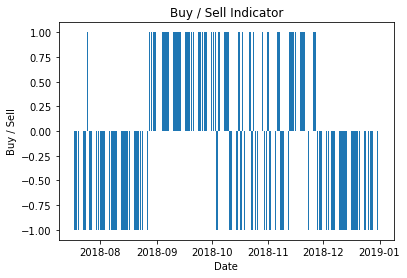

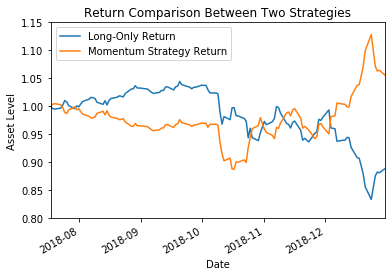

In [37]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

y_pre = np.array([])
for i in range(0,61,30):
    X_training_set = df.iloc[i:(i+100),:]
    y_training_set = df.iloc[(i+1):(i+101),:]
    predict_set = df.iloc[(i+100):(i+130),:]
    X_training = X_training_set[["SPY - 1 Week","SPY - 2 Weeks","SPY - 1 Month","SPY - 2 Months",
                               "XLK - 1 Week","XLK - 2 Weeks","XLK - 1 Month","XLK - 2 Months",
                               "XLF - 1 Week","XLF - 2 Weeks","XLF - 1 Month","XLF - 2 Months",
                               "XLI - 1 Week","XLI - 2 Weeks","XLI - 1 Month","XLI - 2 Months",]].to_numpy().reshape((-1,16))
    y_training = y_training_set["SPY"].to_numpy().reshape((-1,1))
    X_pre = predict_set[["SPY - 1 Week","SPY - 2 Weeks","SPY - 1 Month","SPY - 2 Months",
                               "XLK - 1 Week","XLK - 2 Weeks","XLK - 1 Month","XLK - 2 Months",
                               "XLF - 1 Week","XLF - 2 Weeks","XLF - 1 Month","XLF - 2 Months",
                               "XLI - 1 Week","XLI - 2 Weeks","XLI - 1 Month","XLI - 2 Months",]].to_numpy().reshape((-1,16))
    scaler = StandardScaler().fit(X_training)
    X_training = scaler.transform(X_training)
    X_pre = scaler.transform(X_pre)
    regr = KNeighborsRegressor(n_neighbors=51).fit(X_training, y_training)
    pre = regr.predict(X_pre).reshape((1,-1))
    y_pre = np.concatenate((y_pre,pre),axis=None)
    
X_training_set = df.iloc[90:190,:]
y_training_set = df.iloc[91:191,:]
predict_set = df.iloc[190:,:]
X_training = X_training_set[["SPY - 1 Week","SPY - 2 Weeks","SPY - 1 Month","SPY - 2 Months",
                            "XLK - 1 Week","XLK - 2 Weeks","XLK - 1 Month","XLK - 2 Months",
                            "XLF - 1 Week","XLF - 2 Weeks","XLF - 1 Month","XLF - 2 Months",
                            "XLI - 1 Week","XLI - 2 Weeks","XLI - 1 Month","XLI - 2 Months",]].to_numpy().reshape((-1,16))
y_training = y_training_set["SPY"].to_numpy().reshape((-1,1))
X_pre = predict_set[["SPY - 1 Week","SPY - 2 Weeks","SPY - 1 Month","SPY - 2 Months",
                            "XLK - 1 Week","XLK - 2 Weeks","XLK - 1 Month","XLK - 2 Months",
                            "XLF - 1 Week","XLF - 2 Weeks","XLF - 1 Month","XLF - 2 Months",
                            "XLI - 1 Week","XLI - 2 Weeks","XLI - 1 Month","XLI - 2 Months",]].to_numpy().reshape((-1,16))
scaler = StandardScaler().fit(X_training)
X_training = scaler.transform(X_training)
X_pre = scaler.transform(X_pre)
regr = KNeighborsRegressor(n_neighbors=51).fit(X_training, y_training)
pre = regr.predict(X_pre).reshape((1,-1))
y_pre = np.concatenate((y_pre,pre),axis=None)
zero = np.zeros(100)
y_pre = np.concatenate((zero,y_pre),axis=None)

y_pre = list(y_pre)
data = df.copy()
data.insert(1, "kNN Next-Day Prediction", y_pre, True)

plot_data = data.iloc[100:,:]

strat = []
for i in range(len(plot_data["SPY"])):
    if plot_data["kNN Next-Day Prediction"][i] >= 0:
        strat.append(1)
    else:
        strat.append(-1)
        
plot_data.insert(2,"Next-Day Strategy",strat,True)
plot_data.index = pd.to_datetime(plot_data.index)
plt.bar(plot_data.index,height=plot_data['Next-Day Strategy'])
plt.xlabel('Date')
plt.ylabel('Buy / Sell')
plt.title('Buy / Sell Indicator')

long_only = [1]
momentum_strat = [1]
for i in range(len(plot_data["SPY"])-1):
    long_only.append(long_only[-1]*(1+plot_data["SPY"][i+1]))
    if plot_data['Next-Day Strategy'][i] == 1:
        momentum_strat.append(momentum_strat[-1]*(1+plot_data["SPY"][i+1]))
    else:
        momentum_strat.append(momentum_strat[-1]*(1-plot_data["SPY"][i+1]))

plot_data.insert(3,"Long-Only Return",long_only,True)
plot_data.insert(4,"Momentum Strategy Return",momentum_strat,True)

return_plot = plot_data.plot(y=['Long-Only Return','Momentum Strategy Return'], use_index=True, title="Return Comparison Between Two Strategies",ylim=(0.8,1.15))
return_plot.set_ylabel("Asset Level")

return_plot
plot_data.head()

In [38]:
long_annualized = plot_data['Long-Only Return'][-1]**(252/(len(plot_data['SPY'])-1))-1
strat_annualized = plot_data['Momentum Strategy Return'][-1]**(252/(len(plot_data['SPY'])-1))-1

In [39]:
print("By building momentum strategy from kNN regressor, we can gain a better return over this period. The momentum strategy annualized return is {m}, while the annualized return we will get if we long the index during the period is {l}.".format(m=strat_annualized, l=long_annualized))

By building momentum strategy from kNN regressor, we can gain a better return over this period. The momentum strategy annualized return is 0.12649338857372094, while the annualized return we will get if we long the index during the period is -0.22862152971477145.


### (4) Lasso

/Users/zheyugu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zheyugu/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/zheyugu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zheyugu/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5

/Users/zheyugu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.188807843083121e-05, tolerance: 6.74377057427632e-07
  tol, rng, random, positive)
/Users/zheyugu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.1703876521836615e-05, tolerance: 6.74377057427632e-07
  tol, rng, random, positive)
/Users/zheyugu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.1529942393732306e-05, tolerance: 6.74377057427632e-07
  tol, rng, random, positive)
/Users/zheyugu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:47

,SPY,Lasso Next-Day Prediction,Next-Day Strategy,Long-Only Return,Momentum Strategy Return,SPY - 1 Week,SPY - 2 Weeks,SPY - 1 Month,SPY - 2 Months,XLK - 1 Week,...,XLK - 1 Month,XLK - 2 Months,XLF - 1 Week,XLF - 2 Weeks,XLF - 1 Month,XLF - 2 Months,XLI - 1 Week,XLI - 2 Weeks,XLI - 1 Month,XLI - 2 Months
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-18,0.002104,0.000268,1,1.000000,1.000000,0.006049,0.029109,0.018444,0.030997,0.002341,...,0.016904,0.049301,0.030627,0.052374,0.023827,-0.014467,0.016083,0.036713,0.017331,-0.012975
2018-07-19,-0.003771,0.000268,1,0.996229,0.996229,0.001466,0.016629,0.021004,0.024290,-0.000138,...,0.021118,0.037922,0.019644,0.031496,0.011397,-0.023082,0.010441,0.032705,0.029851,-0.012457
2018-07-20,-0.001143,0.000268,1,0.995090,0.995090,0.001217,0.006405,0.017981,0.025220,0.002487,...,0.024718,0.039398,0.003642,0.010264,0.018101,-0.013601,0.013479,0.012789,0.025203,-0.018330
2018-07-23,0.001859,0.000268,1,0.996940,0.996940,-0.000963,0.004661,0.033948,0.029579,0.000137,...,0.051781,0.045448,0.016370,0.027962,0.043316,0.003232,0.003255,0.003391,0.031943,-0.022592
2018-07-24,0.005032,0.000268,1,1.001957,1.001957,0.001957,0.017157,0.036856,0.046799,0.007281,...,0.053297,0.056941,0.003222,0.035860,0.049831,0.040862,-0.003488,0.024407,0.032379,-0.002551


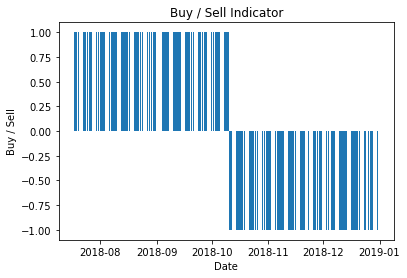

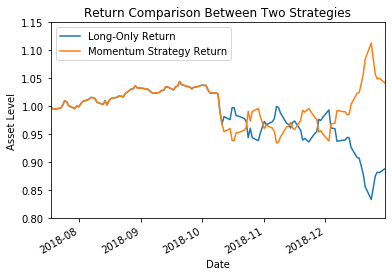

In [40]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

y_pre = np.array([])
for i in range(0,61,30):
    X_training_set = df.iloc[i:(i+100),:]
    y_training_set = df.iloc[(i+1):(i+101),:]
    predict_set = df.iloc[(i+100):(i+130),:]
    X_training = X_training_set[["SPY - 1 Week","SPY - 2 Weeks","SPY - 1 Month","SPY - 2 Months",
                               "XLK - 1 Week","XLK - 2 Weeks","XLK - 1 Month","XLK - 2 Months",
                               "XLF - 1 Week","XLF - 2 Weeks","XLF - 1 Month","XLF - 2 Months",
                               "XLI - 1 Week","XLI - 2 Weeks","XLI - 1 Month","XLI - 2 Months",]].to_numpy().reshape((-1,16))
    y_training = y_training_set["SPY"].to_numpy().reshape((-1,1))
    X_pre = predict_set[["SPY - 1 Week","SPY - 2 Weeks","SPY - 1 Month","SPY - 2 Months",
                               "XLK - 1 Week","XLK - 2 Weeks","XLK - 1 Month","XLK - 2 Months",
                               "XLF - 1 Week","XLF - 2 Weeks","XLF - 1 Month","XLF - 2 Months",
                               "XLI - 1 Week","XLI - 2 Weeks","XLI - 1 Month","XLI - 2 Months",]].to_numpy().reshape((-1,16))
    scaler = StandardScaler().fit(X_training)
    X_training = scaler.transform(X_training)
    X_pre = scaler.transform(X_pre)
    lasso = LassoCV()
    lasso.fit(X_training, y_training)
    est = lasso.alpha_
    regr = Lasso(alpha=est).fit(X_training, y_training)
    pre = regr.predict(X_pre).reshape((1,-1))
    y_pre = np.concatenate((y_pre,pre),axis=None)
    
X_training_set = df.iloc[90:190,:]
y_training_set = df.iloc[91:191,:]
predict_set = df.iloc[190:,:]
X_training = X_training_set[["SPY - 1 Week","SPY - 2 Weeks","SPY - 1 Month","SPY - 2 Months",
                            "XLK - 1 Week","XLK - 2 Weeks","XLK - 1 Month","XLK - 2 Months",
                            "XLF - 1 Week","XLF - 2 Weeks","XLF - 1 Month","XLF - 2 Months",
                            "XLI - 1 Week","XLI - 2 Weeks","XLI - 1 Month","XLI - 2 Months",]].to_numpy().reshape((-1,16))
y_training = y_training_set["SPY"].to_numpy().reshape((-1,1))
X_pre = predict_set[["SPY - 1 Week","SPY - 2 Weeks","SPY - 1 Month","SPY - 2 Months",
                            "XLK - 1 Week","XLK - 2 Weeks","XLK - 1 Month","XLK - 2 Months",
                            "XLF - 1 Week","XLF - 2 Weeks","XLF - 1 Month","XLF - 2 Months",
                            "XLI - 1 Week","XLI - 2 Weeks","XLI - 1 Month","XLI - 2 Months",]].to_numpy().reshape((-1,16))
scaler = StandardScaler().fit(X_training)
X_training = scaler.transform(X_training)
X_pre = scaler.transform(X_pre)
lasso = LassoCV()
lasso.fit(X_training, y_training)
est = lasso.alpha_
regr = Lasso(alpha=est).fit(X_training, y_training)
pre = regr.predict(X_pre).reshape((1,-1))
y_pre = np.concatenate((y_pre,pre),axis=None)
zero = np.zeros(100)
y_pre = np.concatenate((zero,y_pre),axis=None)

y_pre = list(y_pre)
data = df.copy()
data.insert(1, "Lasso Next-Day Prediction", y_pre, True)

plot_data = data.iloc[100:,:]

strat = []
for i in range(len(plot_data["SPY"])):
    if plot_data["Lasso Next-Day Prediction"][i] >= 0:
        strat.append(1)
    else:
        strat.append(-1)
        
plot_data.insert(2,"Next-Day Strategy",strat,True)
plot_data.index = pd.to_datetime(plot_data.index)
plt.bar(plot_data.index,height=plot_data['Next-Day Strategy'])
plt.xlabel('Date')
plt.ylabel('Buy / Sell')
plt.title('Buy / Sell Indicator')

long_only = [1]
momentum_strat = [1]
for i in range(len(plot_data["SPY"])-1):
    long_only.append(long_only[-1]*(1+plot_data["SPY"][i+1]))
    if plot_data['Next-Day Strategy'][i] == 1:
        momentum_strat.append(momentum_strat[-1]*(1+plot_data["SPY"][i+1]))
    else:
        momentum_strat.append(momentum_strat[-1]*(1-plot_data["SPY"][i+1]))

plot_data.insert(3,"Long-Only Return",long_only,True)
plot_data.insert(4,"Momentum Strategy Return",momentum_strat,True)

return_plot = plot_data.plot(y=['Long-Only Return','Momentum Strategy Return'], use_index=True, title="Return Comparison Between Two Strategies",ylim=(0.8,1.15))
return_plot.set_ylabel("Asset Level")

return_plot
plot_data.head()

In [41]:
long_annualized = plot_data['Long-Only Return'][-1]**(252/(len(plot_data['SPY'])-1))-1
strat_annualized = plot_data['Momentum Strategy Return'][-1]**(252/(len(plot_data['SPY'])-1))-1

In [42]:
print("By building momentum strategy from lasso regression, we can gain a better return over this period. The momentum strategy annualized return is {m}, while the annualized return we will get if we long the index during the period is {l}.".format(m=strat_annualized, l=long_annualized))

By building momentum strategy from lasso regression, we can gain a better return over this period. The momentum strategy annualized return is 0.09332194568552432, while the annualized return we will get if we long the index during the period is -0.22862152971477145.


### (5) Ridge

,SPY,Ridge Next-Day Prediction,Next-Day Strategy,Long-Only Return,Momentum Strategy Return,SPY - 1 Week,SPY - 2 Weeks,SPY - 1 Month,SPY - 2 Months,XLK - 1 Week,...,XLK - 1 Month,XLK - 2 Months,XLF - 1 Week,XLF - 2 Weeks,XLF - 1 Month,XLF - 2 Months,XLI - 1 Week,XLI - 2 Weeks,XLI - 1 Month,XLI - 2 Months
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-18,0.002104,-0.002438,-1,1.000000,1.000000,0.006049,0.029109,0.018444,0.030997,0.002341,...,0.016904,0.049301,0.030627,0.052374,0.023827,-0.014467,0.016083,0.036713,0.017331,-0.012975
2018-07-19,-0.003771,-0.000015,-1,0.996229,1.003771,0.001466,0.016629,0.021004,0.024290,-0.000138,...,0.021118,0.037922,0.019644,0.031496,0.011397,-0.023082,0.010441,0.032705,0.029851,-0.012457
2018-07-20,-0.001143,0.004947,1,0.995090,1.004919,0.001217,0.006405,0.017981,0.025220,0.002487,...,0.024718,0.039398,0.003642,0.010264,0.018101,-0.013601,0.013479,0.012789,0.025203,-0.018330
2018-07-23,0.001859,0.003579,1,0.996940,1.006787,-0.000963,0.004661,0.033948,0.029579,0.000137,...,0.051781,0.045448,0.016370,0.027962,0.043316,0.003232,0.003255,0.003391,0.031943,-0.022592
2018-07-24,0.005032,0.005081,1,1.001957,1.011853,0.001957,0.017157,0.036856,0.046799,0.007281,...,0.053297,0.056941,0.003222,0.035860,0.049831,0.040862,-0.003488,0.024407,0.032379,-0.002551


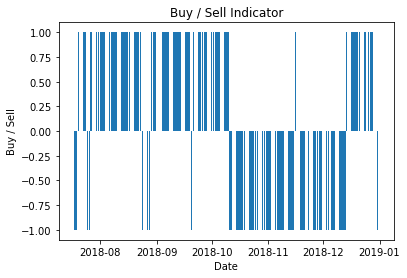

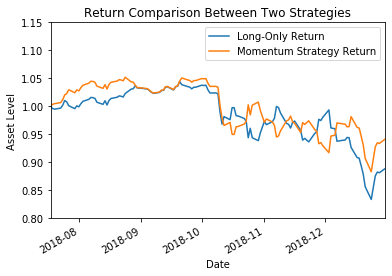

In [43]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

y_pre = np.array([])
for i in range(0,61,30):
    X_training_set = df.iloc[i:(i+100),:]
    y_training_set = df.iloc[(i+1):(i+101),:]
    predict_set = df.iloc[(i+100):(i+130),:]
    X_training = X_training_set[["SPY - 1 Week","SPY - 2 Weeks","SPY - 1 Month","SPY - 2 Months",
                               "XLK - 1 Week","XLK - 2 Weeks","XLK - 1 Month","XLK - 2 Months",
                               "XLF - 1 Week","XLF - 2 Weeks","XLF - 1 Month","XLF - 2 Months",
                               "XLI - 1 Week","XLI - 2 Weeks","XLI - 1 Month","XLI - 2 Months",]].to_numpy().reshape((-1,16))
    y_training = y_training_set["SPY"].to_numpy().reshape((-1,1))
    X_pre = predict_set[["SPY - 1 Week","SPY - 2 Weeks","SPY - 1 Month","SPY - 2 Months",
                               "XLK - 1 Week","XLK - 2 Weeks","XLK - 1 Month","XLK - 2 Months",
                               "XLF - 1 Week","XLF - 2 Weeks","XLF - 1 Month","XLF - 2 Months",
                               "XLI - 1 Week","XLI - 2 Weeks","XLI - 1 Month","XLI - 2 Months",]].to_numpy().reshape((-1,16))
    scaler = StandardScaler().fit(X_training)
    X_training = scaler.transform(X_training)
    X_pre = scaler.transform(X_pre)
    ridge = RidgeCV()
    ridge.fit(X_training, y_training)
    est = ridge.alpha_
    regr = Ridge(alpha=est).fit(X_training, y_training)
    pre = regr.predict(X_pre).reshape((1,-1))
    y_pre = np.concatenate((y_pre,pre),axis=None)
    
X_training_set = df.iloc[90:190,:]
y_training_set = df.iloc[91:191,:]
predict_set = df.iloc[190:,:]
X_training = X_training_set[["SPY - 1 Week","SPY - 2 Weeks","SPY - 1 Month","SPY - 2 Months",
                            "XLK - 1 Week","XLK - 2 Weeks","XLK - 1 Month","XLK - 2 Months",
                            "XLF - 1 Week","XLF - 2 Weeks","XLF - 1 Month","XLF - 2 Months",
                            "XLI - 1 Week","XLI - 2 Weeks","XLI - 1 Month","XLI - 2 Months",]].to_numpy().reshape((-1,16))
y_training = y_training_set["SPY"].to_numpy().reshape((-1,1))
X_pre = predict_set[["SPY - 1 Week","SPY - 2 Weeks","SPY - 1 Month","SPY - 2 Months",
                            "XLK - 1 Week","XLK - 2 Weeks","XLK - 1 Month","XLK - 2 Months",
                            "XLF - 1 Week","XLF - 2 Weeks","XLF - 1 Month","XLF - 2 Months",
                            "XLI - 1 Week","XLI - 2 Weeks","XLI - 1 Month","XLI - 2 Months",]].to_numpy().reshape((-1,16))
scaler = StandardScaler().fit(X_training)
X_training = scaler.transform(X_training)
X_pre = scaler.transform(X_pre)
ridge = RidgeCV()
ridge.fit(X_training, y_training)
est = ridge.alpha_
regr = Ridge(alpha=est).fit(X_training, y_training)
pre = regr.predict(X_pre).reshape((1,-1))
y_pre = np.concatenate((y_pre,pre),axis=None)
zero = np.zeros(100)
y_pre = np.concatenate((zero,y_pre),axis=None)

y_pre = list(y_pre)
data = df.copy()
data.insert(1, "Ridge Next-Day Prediction", y_pre, True)

plot_data = data.iloc[100:,:]

strat = []
for i in range(len(plot_data["SPY"])):
    if plot_data["Ridge Next-Day Prediction"][i] >= 0:
        strat.append(1)
    else:
        strat.append(-1)
        
plot_data.insert(2,"Next-Day Strategy",strat,True)
plot_data.index = pd.to_datetime(plot_data.index)
plt.bar(plot_data.index,height=plot_data['Next-Day Strategy'])
plt.xlabel('Date')
plt.ylabel('Buy / Sell')
plt.title('Buy / Sell Indicator')

long_only = [1]
momentum_strat = [1]
for i in range(len(plot_data["SPY"])-1):
    long_only.append(long_only[-1]*(1+plot_data["SPY"][i+1]))
    if plot_data['Next-Day Strategy'][i] == 1:
        momentum_strat.append(momentum_strat[-1]*(1+plot_data["SPY"][i+1]))
    else:
        momentum_strat.append(momentum_strat[-1]*(1-plot_data["SPY"][i+1]))

plot_data.insert(3,"Long-Only Return",long_only,True)
plot_data.insert(4,"Momentum Strategy Return",momentum_strat,True)

return_plot = plot_data.plot(y=['Long-Only Return','Momentum Strategy Return'], use_index=True, title="Return Comparison Between Two Strategies",ylim=(0.8,1.15))
return_plot.set_ylabel("Asset Level")

return_plot
plot_data.head()

In [44]:
long_annualized = plot_data['Long-Only Return'][-1]**(252/(len(plot_data['SPY'])-1))-1
strat_annualized = plot_data['Momentum Strategy Return'][-1]**(252/(len(plot_data['SPY'])-1))-1

In [45]:
print("By building momentum strategy from ridge regression, we can gain a better return over this period. The momentum strategy annualized return is {m}, while the annualized return we will get if we long the index during the period is {l}.".format(m=strat_annualized, l=long_annualized))

By building momentum strategy from ridge regression, we can gain a better return over this period. The momentum strategy annualized return is -0.12382295550253364, while the annualized return we will get if we long the index during the period is -0.22862152971477145.


### (6) ElasticNet

/Users/zheyugu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zheyugu/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/zheyugu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zheyugu/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5

,SPY,ElasticNet Next-Day Prediction,Next-Day Strategy,Long-Only Return,Momentum Strategy Return,SPY - 1 Week,SPY - 2 Weeks,SPY - 1 Month,SPY - 2 Months,XLK - 1 Week,...,XLK - 1 Month,XLK - 2 Months,XLF - 1 Week,XLF - 2 Weeks,XLF - 1 Month,XLF - 2 Months,XLI - 1 Week,XLI - 2 Weeks,XLI - 1 Month,XLI - 2 Months
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-18,0.002104,0.000268,1,1.000000,1.000000,0.006049,0.029109,0.018444,0.030997,0.002341,...,0.016904,0.049301,0.030627,0.052374,0.023827,-0.014467,0.016083,0.036713,0.017331,-0.012975
2018-07-19,-0.003771,0.000268,1,0.996229,0.996229,0.001466,0.016629,0.021004,0.024290,-0.000138,...,0.021118,0.037922,0.019644,0.031496,0.011397,-0.023082,0.010441,0.032705,0.029851,-0.012457
2018-07-20,-0.001143,0.000268,1,0.995090,0.995090,0.001217,0.006405,0.017981,0.025220,0.002487,...,0.024718,0.039398,0.003642,0.010264,0.018101,-0.013601,0.013479,0.012789,0.025203,-0.018330
2018-07-23,0.001859,0.000268,1,0.996940,0.996940,-0.000963,0.004661,0.033948,0.029579,0.000137,...,0.051781,0.045448,0.016370,0.027962,0.043316,0.003232,0.003255,0.003391,0.031943,-0.022592
2018-07-24,0.005032,0.000268,1,1.001957,1.001957,0.001957,0.017157,0.036856,0.046799,0.007281,...,0.053297,0.056941,0.003222,0.035860,0.049831,0.040862,-0.003488,0.024407,0.032379,-0.002551


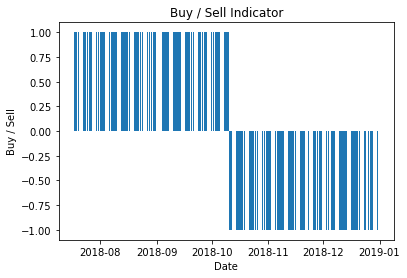

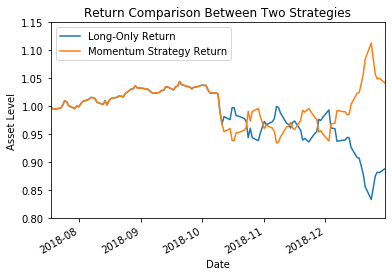

In [46]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

y_pre = np.array([])
for i in range(0,61,30):
    X_training_set = df.iloc[i:(i+100),:]
    y_training_set = df.iloc[(i+1):(i+101),:]
    predict_set = df.iloc[(i+100):(i+130),:]
    X_training = X_training_set[["SPY - 1 Week","SPY - 2 Weeks","SPY - 1 Month","SPY - 2 Months",
                               "XLK - 1 Week","XLK - 2 Weeks","XLK - 1 Month","XLK - 2 Months",
                               "XLF - 1 Week","XLF - 2 Weeks","XLF - 1 Month","XLF - 2 Months",
                               "XLI - 1 Week","XLI - 2 Weeks","XLI - 1 Month","XLI - 2 Months",]].to_numpy().reshape((-1,16))
    y_training = y_training_set["SPY"].to_numpy().reshape((-1,1))
    X_pre = predict_set[["SPY - 1 Week","SPY - 2 Weeks","SPY - 1 Month","SPY - 2 Months",
                               "XLK - 1 Week","XLK - 2 Weeks","XLK - 1 Month","XLK - 2 Months",
                               "XLF - 1 Week","XLF - 2 Weeks","XLF - 1 Month","XLF - 2 Months",
                               "XLI - 1 Week","XLI - 2 Weeks","XLI - 1 Month","XLI - 2 Months",]].to_numpy().reshape((-1,16))
    scaler = StandardScaler().fit(X_training)
    X_training = scaler.transform(X_training)
    X_pre = scaler.transform(X_pre)
    EN = ElasticNetCV()
    EN.fit(X_training, y_training)
    est1 = EN.alpha_
    est2 = EN.l1_ratio_
    regr = ElasticNet(alpha=est1,l1_ratio=est2).fit(X_training, y_training)
    pre = regr.predict(X_pre).reshape((1,-1))
    y_pre = np.concatenate((y_pre,pre),axis=None)
    
X_training_set = df.iloc[90:190,:]
y_training_set = df.iloc[91:191,:]
predict_set = df.iloc[190:,:]
X_training = X_training_set[["SPY - 1 Week","SPY - 2 Weeks","SPY - 1 Month","SPY - 2 Months",
                            "XLK - 1 Week","XLK - 2 Weeks","XLK - 1 Month","XLK - 2 Months",
                            "XLF - 1 Week","XLF - 2 Weeks","XLF - 1 Month","XLF - 2 Months",
                            "XLI - 1 Week","XLI - 2 Weeks","XLI - 1 Month","XLI - 2 Months",]].to_numpy().reshape((-1,16))
y_training = y_training_set["SPY"].to_numpy().reshape((-1,1))
X_pre = predict_set[["SPY - 1 Week","SPY - 2 Weeks","SPY - 1 Month","SPY - 2 Months",
                            "XLK - 1 Week","XLK - 2 Weeks","XLK - 1 Month","XLK - 2 Months",
                            "XLF - 1 Week","XLF - 2 Weeks","XLF - 1 Month","XLF - 2 Months",
                            "XLI - 1 Week","XLI - 2 Weeks","XLI - 1 Month","XLI - 2 Months",]].to_numpy().reshape((-1,16))
scaler = StandardScaler().fit(X_training)
X_training = scaler.transform(X_training)
X_pre = scaler.transform(X_pre)
EN = ElasticNetCV()
EN.fit(X_training, y_training)
est1 = EN.alpha_
est2 = EN.l1_ratio_
regr = ElasticNet(alpha=est1,l1_ratio=est2).fit(X_training, y_training)
pre = regr.predict(X_pre).reshape((1,-1))
y_pre = np.concatenate((y_pre,pre),axis=None)
zero = np.zeros(100)
y_pre = np.concatenate((zero,y_pre),axis=None)

y_pre = list(y_pre)
data = df.copy()
data.insert(1, "ElasticNet Next-Day Prediction", y_pre, True)

plot_data = data.iloc[100:,:]

strat = []
for i in range(len(plot_data["SPY"])):
    if plot_data["ElasticNet Next-Day Prediction"][i] >= 0:
        strat.append(1)
    else:
        strat.append(-1)
        
plot_data.insert(2,"Next-Day Strategy",strat,True)
plot_data.index = pd.to_datetime(plot_data.index)
plt.bar(plot_data.index,height=plot_data['Next-Day Strategy'])
plt.xlabel('Date')
plt.ylabel('Buy / Sell')
plt.title('Buy / Sell Indicator')

long_only = [1]
momentum_strat = [1]
for i in range(len(plot_data["SPY"])-1):
    long_only.append(long_only[-1]*(1+plot_data["SPY"][i+1]))
    if plot_data['Next-Day Strategy'][i] == 1:
        momentum_strat.append(momentum_strat[-1]*(1+plot_data["SPY"][i+1]))
    else:
        momentum_strat.append(momentum_strat[-1]*(1-plot_data["SPY"][i+1]))

plot_data.insert(3,"Long-Only Return",long_only,True)
plot_data.insert(4,"Momentum Strategy Return",momentum_strat,True)

return_plot = plot_data.plot(y=['Long-Only Return','Momentum Strategy Return'], use_index=True, title="Return Comparison Between Two Strategies",ylim=(0.8,1.15))
return_plot.set_ylabel("Asset Level")

return_plot
plot_data.head()

In [47]:
long_annualized = plot_data['Long-Only Return'][-1]**(252/(len(plot_data['SPY'])-1))-1
strat_annualized = plot_data['Momentum Strategy Return'][-1]**(252/(len(plot_data['SPY'])-1))-1

In [48]:
print("By building momentum strategy from ElasticNet regression, we can gain a better return over this period. The momentum strategy annualized return is {m}, while the annualized return we will get if we long the index during the period is {l}.".format(m=strat_annualized, l=long_annualized))

By building momentum strategy from ElasticNet regression, we can gain a better return over this period. The momentum strategy annualized return is 0.09332194568552432, while the annualized return we will get if we long the index during the period is -0.22862152971477145.


### (7) Conclusion from the Analysis

By looking at the momentum strategy results of the five regression algorithms, we first notice almost every algorithm (except Ordinary Least Squares which produces return very closed to the market) can help us better determine the direction of the market on each day, thus generating higher returns than simply doing long position of the index under this specific market situation. Among these strategies, kNN, Lasso, and ElasticNet are the algorithms which generate the most significant differences against "naive" trading strategy, with kNN annualized return being 12.6% when k=51, and Lasso and ElasticNet annualized returns both being 9.3%. The annualized market return is only -22.9%, which is not a much difference between Ordinary Least Squares annualized return -20.6%, given information during this period. However, it is still not guaranteed that this strategy can always help us beat the market every time as there are lots of other factors affecting the result, such as choices of algorithm parameters and overall market situations (i.e. how much noises and signals the market has over a certain period). The choices of algorithm parameters are also the deciding factors to determine which algorithms are more preferred under this certain market situations. 